add fte to to district resources - then add to scores 

load data sets

join on unique identifier 



In [2]:
import pandas as pd
import numpy as np 
import dabl
import seaborn as sns
import matplotlib.pyplot as plt


## load FTE data 

In [23]:
fte = pd.read_excel('../../data/raw/2021_cal_school_FTE_numbers.xlsx',header=6)
fte.rename(columns={'Agency Name':'District Name',
            'Agency ID - NCES Assigned [District] Latest available year':'Agency_ID'},inplace=True)
fte['District Name'] = fte['District Name'].astype(str).str.lower()
fte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   District Name                                                2137 non-null   object 
 1   State Name [District] Latest available year                  2130 non-null   object 
 2   State Name [District] 2020-21                                2130 non-null   object 
 3   Agency_ID                                                    2130 non-null   float64
 4   County Name [District] 2020-21                               2130 non-null   object 
 5   Total Students, All Grades (Excludes AE) [District] 2020-21  2130 non-null   object 
 6   Full-Time Equivalent (FTE) Teachers [District] 2020-21       2130 non-null   object 
 7   Pupil/Teacher Ratio [District] 2020-21                       2130 non-null   ob

In [24]:
fte.head()

,District Name,State Name [District] Latest available year,State Name [District] 2020-21,Agency_ID,County Name [District] 2020-21,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21
0,abc unified,California,CALIFORNIA,601620.0,Los Angeles County,19540,822.59,23.75
1,academia avance charter district,CALIFORNIA,CALIFORNIA,602291.0,Los Angeles County,293,13.5,21.7
2,academia moderna district,CALIFORNIA,CALIFORNIA,602361.0,Los Angeles County,446,18,24.78
3,academy for academic excellence district,CALIFORNIA,CALIFORNIA,601911.0,San Bernardino County,1466,65.82,22.27
4,academy of media arts district,CALIFORNIA,CALIFORNIA,602503.0,Los Angeles County,63,5,12.6


In [25]:
## check nulls 
m = pd.DataFrame([fte.isnull().sum(),100*fte.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(15)

,count,%
State Name [District] Latest available year,7.0,0.327562
State Name [District] 2020-21,7.0,0.327562
Agency_ID,7.0,0.327562
County Name [District] 2020-21,7.0,0.327562
"Total Students, All Grades (Excludes AE) [District] 2020-21",7.0,0.327562
Full-Time Equivalent (FTE) Teachers [District] 2020-21,7.0,0.327562
Pupil/Teacher Ratio [District] 2020-21,7.0,0.327562
District Name,0.0,0.000000


In [26]:
resources = pd.read_excel('../../data/raw/District_resources.xls',header=6)
resources.rename(columns={'Agency Name':'District Name',
                'Agency ID - NCES Assigned [District] Latest available year':'Agency_ID'},inplace=True)
resources['District Name'] = resources['District Name'].astype(str).str.lower()
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 18 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   District Name                                                       2137 non-null   object 
 1   State Name [District] Latest available year                         2130 non-null   object 
 2   Total Staff [District] 2020-21                                      2130 non-null   object 
 3   Paraprofessionals/Instructional Aides [District] 2020-21            2130 non-null   object 
 4   Total Guidance Counselors [District] 2020-21                        2130 non-null   object 
 5   Instructional Coordinators [District] 2020-21                       2130 non-null   object 
 6   Librarians/media specialists [District] 2020-21                     2130 non-null   object 
 7   LEA Administrat

In [27]:
resources.head()

,District Name,State Name [District] Latest available year,Total Staff [District] 2020-21,Paraprofessionals/Instructional Aides [District] 2020-21,Total Guidance Counselors [District] 2020-21,Instructional Coordinators [District] 2020-21,Librarians/media specialists [District] 2020-21,LEA Administrators [District] 2020-21,LEA Administrative Support Staff [District] 2020-21,School Administrators [District] 2020-21,Student Support Services Staff (w/o Psychology) [District] 2020-21,School Psychologist [District] 2020-21,Other Support Services Staff [District] 2020-21,Agency Name [District] 2020-21,Agency_ID,County Name [District] 2020-21,County Number [District] 2020-21,Total Number Operational Schools [Public School] 2020-21
0,abc unified,California,1565.69,64.47,17,11.5,0,15,0,43,53.9,13.8,419.62,ABC Unified,601620.0,Los Angeles County,6037.0,30.0
1,academia avance charter district,CALIFORNIA,39.25,3.75,3,0,0,0,0,3,0,1,13,Academia Avance Charter District,602291.0,Los Angeles County,6037.0,1.0
2,academia moderna district,CALIFORNIA,36.36,4,0,0,0,1.11,0,2,0,0,8.25,Academia Moderna District,602361.0,Los Angeles County,6037.0,1.0
3,academy for academic excellence district,CALIFORNIA,115.15,10.62,1,1.09,0,2.4,0,3,2,1,17.46,Academy for Academic Excellence District,601911.0,San Bernardino County,6071.0,1.0
4,academy of media arts district,CALIFORNIA,8.13,2.13,0,0,0,0,0,0,0,0,0,Academy of Media Arts District,602503.0,Los Angeles County,6037.0,1.0


In [28]:
district_data = resources.merge(fte,how='inner',on=['District Name','Agency_ID'])
district_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 24 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   District Name                                                       2143 non-null   object 
 1   State Name [District] Latest available year_x                       2130 non-null   object 
 2   Total Staff [District] 2020-21                                      2130 non-null   object 
 3   Paraprofessionals/Instructional Aides [District] 2020-21            2130 non-null   object 
 4   Total Guidance Counselors [District] 2020-21                        2130 non-null   object 
 5   Instructional Coordinators [District] 2020-21                       2130 non-null   object 
 6   Librarians/media specialists [District] 2020-21                     2130 non-null   object 
 7   LEA Administrat

In [29]:
district_data.duplicated().sum()

8

In [30]:
district_data.drop_duplicates(keep='first',inplace=True)
district_data.duplicated().sum()

0

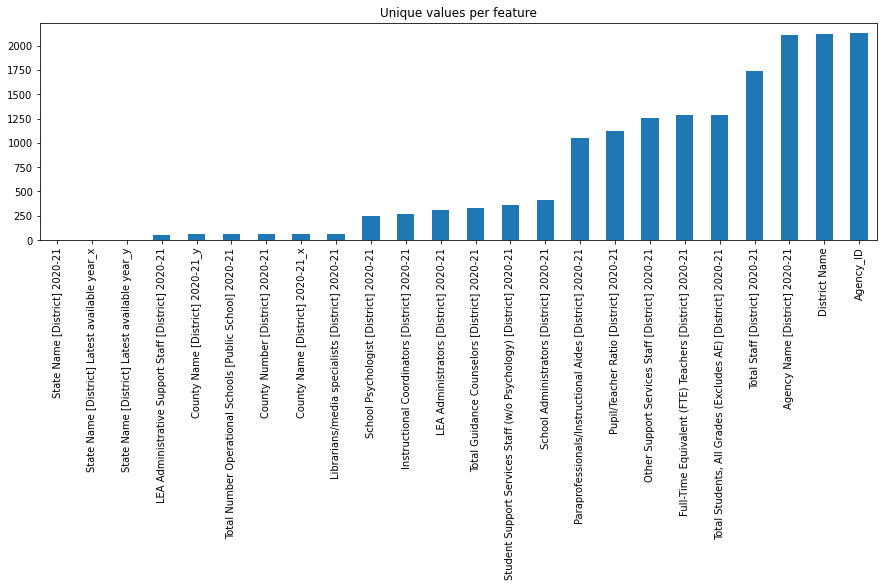

In [40]:
# find number of unique entries for each features
unique_values = district_data.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [31]:
district_data.drop(columns=[ 'State Name [District] Latest available year_y',
                            'County Name [District] 2020-21_y'],inplace=True)

In [32]:
## check nulls 
m = pd.DataFrame([district_data.isnull().sum(),100*district_data.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(15)

,count,%
School Psychologist [District] 2020-21,5.0,0.234192
State Name [District] Latest available year_x,5.0,0.234192
Full-Time Equivalent (FTE) Teachers [District] 2020-21,5.0,0.234192
"Total Students, All Grades (Excludes AE) [District] 2020-21",5.0,0.234192
State Name [District] 2020-21,5.0,0.234192
Total Number Operational Schools [Public School] 2020-21,5.0,0.234192
County Number [District] 2020-21,5.0,0.234192
County Name [District] 2020-21_x,5.0,0.234192
Agency_ID,5.0,0.234192
Agency Name [District] 2020-21,5.0,0.234192


In [33]:
district_data.dropna(axis=0,inplace=True)

In [35]:
## save joined distrcit data

district_data.to_csv('../../data/processed/district_data.csv')

In [49]:
dfs = pd.read_csv('../../data/processed/cleaned_labeled_2021-SB_math_ela_scores.csv')
dfs['District Name'] = dfs['District Name'].str.lower()

In [53]:
## join scores to district data

## join teacher info and scores 

comdf = dfs.merge(district_data, how='left', on=['District Name'],indicator=True)
comdf.drop('Unnamed: 0',axis=1,inplace=True)
comdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29239 entries, 0 to 29238
Data columns (total 59 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   County Code                                                         29239 non-null  int64   
 1   District Code                                                       29239 non-null  int64   
 2   School Code                                                         29239 non-null  int64   
 3   Test Year_x                                                         29239 non-null  int64   
 4   Student Group ID                                                    29239 non-null  int64   
 5   Total Tested at Reporting Level                                     28019 non-null  float64 
 6   Total Tested with Scores at Reporting Level                         28002 non-null  float64 
 7   Grad

In [54]:
comdf['_merge'].value_counts()

both          24435
left_only      4804
right_only        0
Name: _merge, dtype: int64

In [55]:
comdf[[ 'County Name', 'District Name',
       'School Name', 'Zip Code',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21','Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score', '_merge']].sample(4)

,County Name,District Name,School Name,Zip Code,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,Mean Scale Score,_merge
13978,Plumas,plumas unified,Portola Junior/Senior High,96122.0,1661,99.26,16.73,127.0,13,English Language Arts/Literacy,150.0,130.0,NaN,both
3777,Humboldt,agnes j. johnson charter,Agnes J. Johnson Charter,95571.0,NaN,NaN,NaN,44.0,7,Mathematics,4.0,NaN,NaN,left_only
1765,Contra Costa,mt. diablo unified,Pleasant Hill Elementary,94523.0,29908,1305.1,22.92,241.0,3,English Language Arts/Literacy,93.0,89.0,2429.8,both
15498,Sacramento,natomas unified,Inderkum High,95835.0,13748,624.53,22.01,395.0,13,Mathematics,538.0,399.0,NaN,both


In [56]:
cols =  ['Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']

for i in cols:
    comdf[i] = comdf[i].apply(pd.to_numeric,errors='coerce')

In [57]:
comdf[[ 'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']].sample(4)

,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21
11895,407.0,23.39,17.40
16099,8005.0,365.51,21.90
697,3889.0,193.39,20.11
11898,407.0,23.39,17.40


In [62]:

cols = comdf.columns[comdf.dtypes.eq('object')]

convert = cols[5:-3]
convert

# df[convert] = df[convert].apply(pd.to_numeric,errors='coerce')

Index(['Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21'],
      dtype='object')

In [63]:
comdf[convert] = comdf[convert].apply(pd.to_numeric,errors='coerce')
comdf[convert].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29239 entries, 0 to 29238
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Total Staff [District] 2020-21                                      24407 non-null  float64
 1   Paraprofessionals/Instructional Aides [District] 2020-21            24407 non-null  float64
 2   Total Guidance Counselors [District] 2020-21                        24407 non-null  float64
 3   Instructional Coordinators [District] 2020-21                       24407 non-null  float64
 4   Librarians/media specialists [District] 2020-21                     24407 non-null  float64
 5   LEA Administrators [District] 2020-21                               24407 non-null  float64
 6   LEA Administrative Support Staff [District] 2020-21                 24407 non-null  float64
 7   School Admini

In [64]:
## check nulls 
m = pd.DataFrame([comdf.isnull().sum(),100*comdf.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(15)

,count,%
Mean Scale Score,12395.0,42.392011
Area 4 Percentage Below Standard,10268.0,35.117480
Area 1 Percentage Above Standard,10268.0,35.117480
Area 4 Percentage Near Standard,10268.0,35.117480
Area 4 Percentage Above Standard,10268.0,35.117480
Area 3 Percentage Below Standard,10268.0,35.117480
Area 3 Percentage Near Standard,10268.0,35.117480
Area 3 Percentage Above Standard,10268.0,35.117480
Area 2 Percentage Below Standard,10268.0,35.117480
Area 2 Percentage Above Standard,10268.0,35.117480


In [66]:
## looking to keep more scores then drop right now might need to change this tactic later depending

In [65]:
comdf.to_csv('../../data/processed/all_school_data.csv')

In [64]:
comdf.columns

Index(['Unnamed: 0', 'County Code', 'District Code', 'School Code',
       'Test Year_x', 'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'Type ID_x', 'Test Year_y', 'Ty

Target looks like regression
Showing only top 10 of 23 continuous features


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 6 outliers in column Students Enrolled.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together w

[array([[<AxesSubplot:title={'center':'F=1.34E+04'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.28E+04'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.00E+04'}, xlabel='Grade'>,
         <AxesSubplot:title={'center':'F=9.24E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=5.15E+03'}, xlabel='Percentage Standa...'>],
        [<AxesSubplot:title={'center':'F=3.38E+03'}, xlabel='Students Enrolled', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=2.33E+03'}, xlabel='Students with Scores'>,
         <AxesSubplot:title={'center':'F=2.31E+03'}, xlabel='Students Tested'>,
         <AxesSubplot:title={'center':'F=2.25E+02'}, xlabel='Total Students, A...'>,
         <AxesSubplot:title={'center':'F=2.24E+02'}, xlabel='Librarians/media ...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=9.16E-02'}, xlabel='Mean Scale Score', ylabel='County

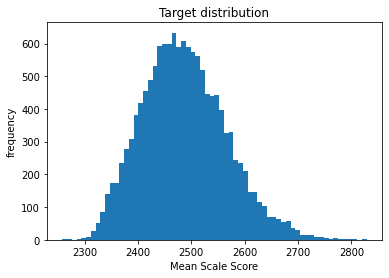

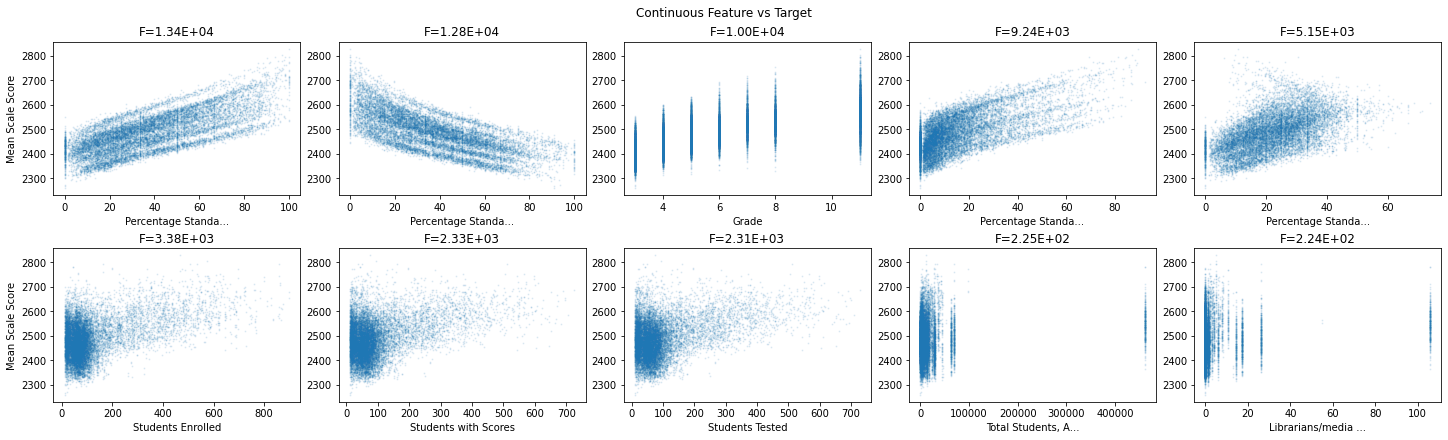

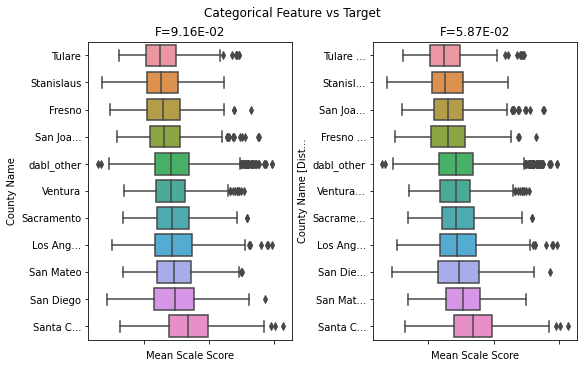

In [66]:
dabl.plot(comdf[[ 
       'Grade','Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'County Name', 'District Name',
       'School Name',
       'County Name [District] 2020-21_x',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']], target_col='Mean Scale Score')

In [86]:
comdf['Test ID'].value_counts()

Mathematics                       12334
English Language Arts/Literacy    12101
Name: Test ID, dtype: int64

In [92]:
math = comdf[(comdf['Test ID']=='English Language Arts/Literacy')&(comdf['Grade']==11)]
print(math.shape)
math.head()

(1430, 60)


,Unnamed: 0,County Code,District Code,School Code,Test Year_x,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Agency Name [District] 2020-21,Agency_ID,County Name [District] 2020-21_x,County Number [District] 2020-21,Total Number Operational Schools [Public School] 2020-21,State Name [District] 2020-21,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21,_merge
0,77,1,10017,136226,2021,1,5.0,5.0,11,English Language Arts/Literacy,...,Alameda County Office of Education,691051.0,Alameda County,6001.0,5.0,CALIFORNIA,289.0,17.75,16.28,both
10,121,1,61127,130450,2021,1,217.0,216.0,11,English Language Arts/Literacy,...,Albany City Unified,601860.0,Alameda County,6001.0,6.0,CALIFORNIA,3501.0,166.07,21.08,both
14,129,1,61143,131177,2021,1,74.0,74.0,11,English Language Arts/Literacy,...,Berkeley Unified,604740.0,Alameda County,6001.0,17.0,CALIFORNIA,9409.0,502.56,18.72,both
18,149,1,61150,132225,2021,1,480.0,473.0,11,English Language Arts/Literacy,...,Castro Valley Unified,607800.0,Alameda County,6001.0,16.0,CALIFORNIA,9203.0,395.49,23.27,both
22,153,1,61150,133876,2021,1,35.0,35.0,11,English Language Arts/Literacy,...,Castro Valley Unified,607800.0,Alameda County,6001.0,16.0,CALIFORNIA,9203.0,395.49,23.27,both


Target looks like regression


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",


[array([[<AxesSubplot:title={'center':'F=7.92E+03'}, xlabel='Mean Scale Score', ylabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.77E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=2.68E+01'}, xlabel='Pupil/Teacher Rat...'>,
         <AxesSubplot:title={'center':'F=1.55E+01'}, xlabel='LEA Administrativ...'>],
        [<AxesSubplot:title={'center':'F=1.39E+01'}, xlabel='Other Support Ser...', ylabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.36E+01'}, xlabel='Instructional Coo...'>,
         <AxesSubplot:title={'center':'F=1.32E+01'}, xlabel='Paraprofessionals...'>,
         <AxesSubplot:title={'center':'F=1.30E+01'}, xlabel='LEA Administrator...'>],
        [<AxesSubplot:title={'center':'F=1.30E+01'}, xlabel='School Administra...', ylabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.29E+01'}, xlabel='Student Support S...'>,
         <AxesSubplot:title={'center':'F=1.25E+01'}, xlabel

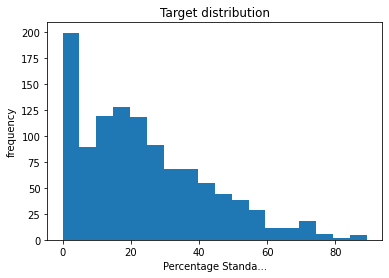

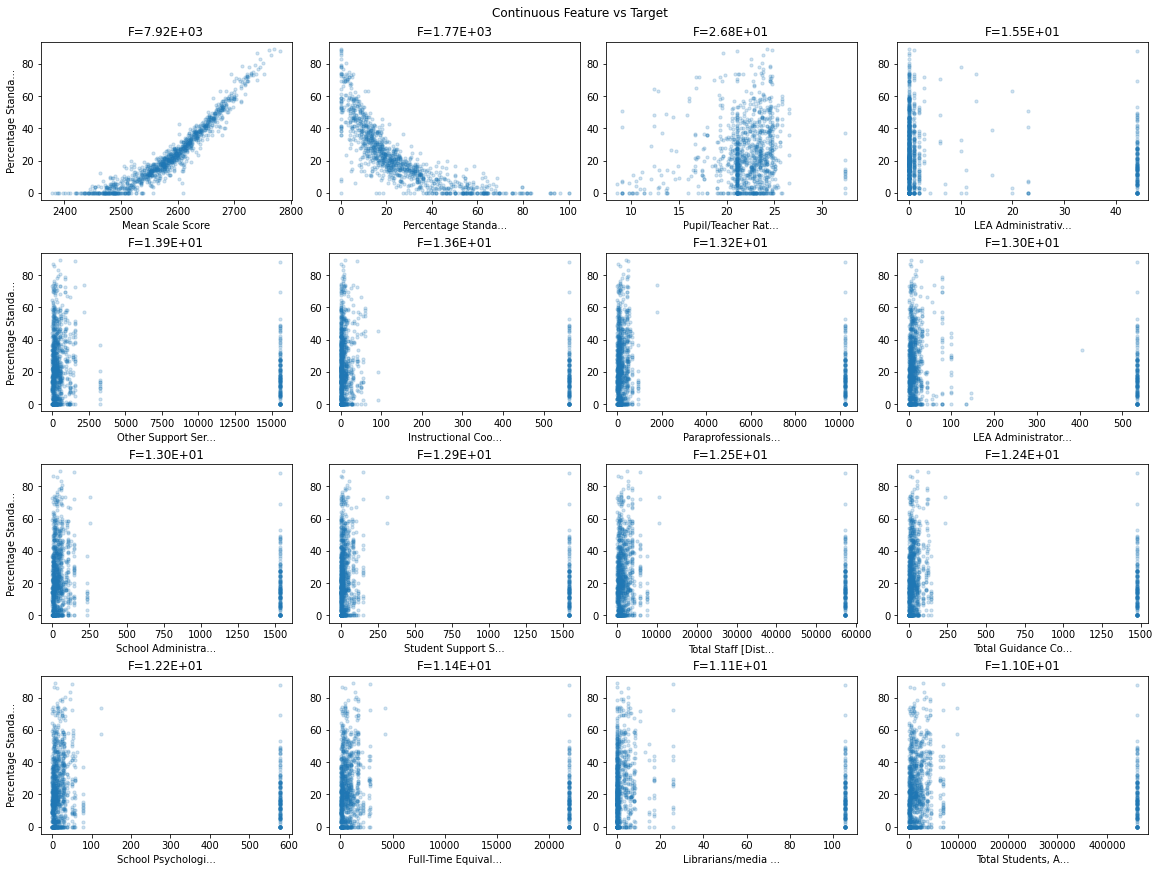

In [100]:
dabl.plot(math[[ 
       'Grade','Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21',
        'Mean Scale Score',
       'Percentage Standard Exceeded', 
       'Percentage Standard Not Met', 
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']], target_col='Percentage Standard Exceeded')

Target looks like regression


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",


[array([[<AxesSubplot:title={'center':'F=8.25E+03'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=7.92E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=4.73E+01'}, xlabel='Pupil/Teacher Rat...'>,
         <AxesSubplot:title={'center':'F=1.63E+01'}, xlabel='LEA Administrativ...'>],
        [<AxesSubplot:title={'center':'F=1.18E+01'}, xlabel='LEA Administrator...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.18E+01'}, xlabel='Other Support Ser...'>,
         <AxesSubplot:title={'center':'F=1.16E+01'}, xlabel='Instructional Coo...'>,
         <AxesSubplot:title={'center':'F=1.11E+01'}, xlabel='Paraprofessionals...'>],
        [<AxesSubplot:title={'center':'F=1.08E+01'}, xlabel='Student Support S...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.07E+01'}, xlabel='School Administra...'>,
         <AxesSubplot:title={'center':'F=1.05E+01'}, xlabel='Total 

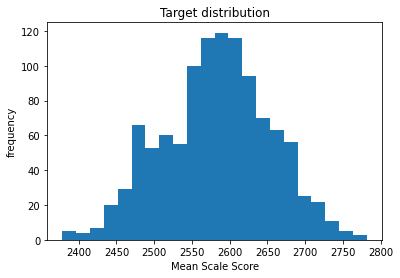

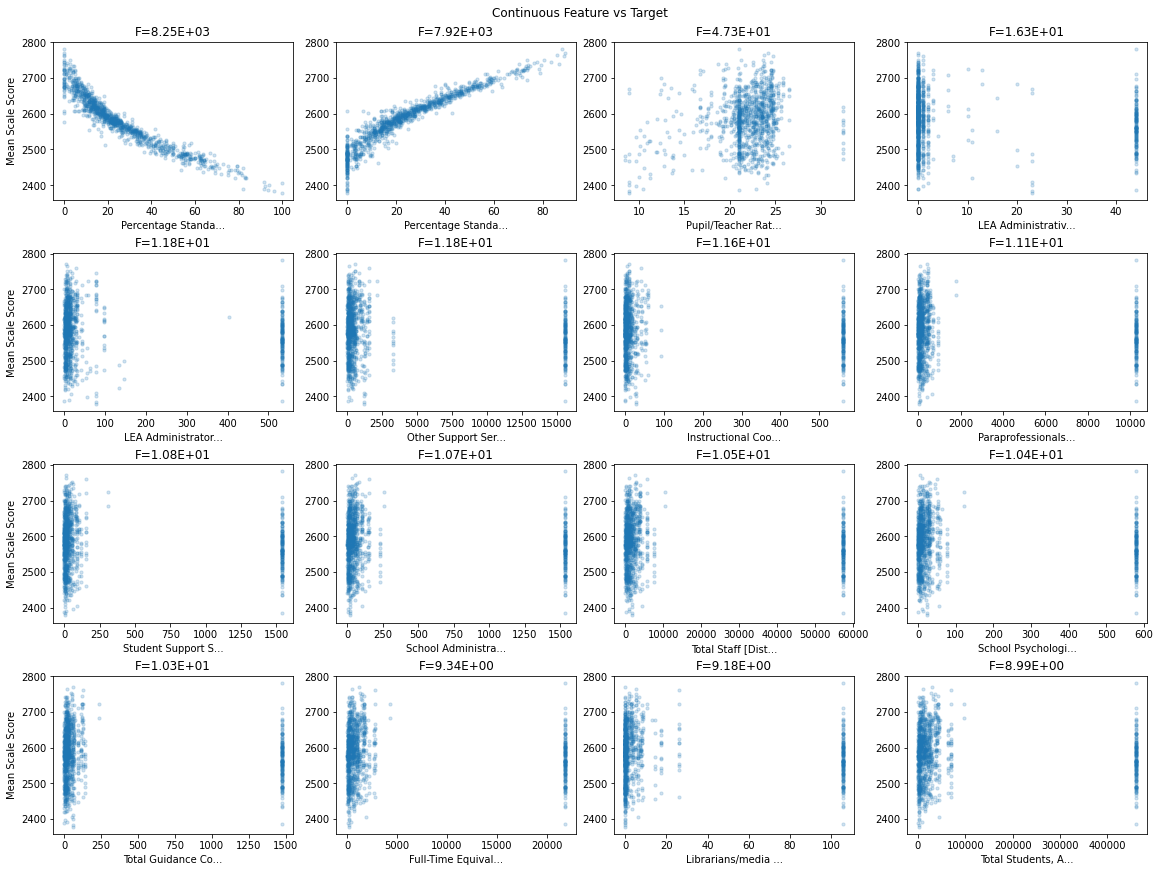

In [101]:
dabl.plot(math[[ 
       'Grade','County Name','Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
        'Percentage Standard Exceeded',
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21',
        'Mean Scale Score', 
       'Percentage Standard Not Met', 
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']], target_col='Mean Scale Score')

In [109]:
heat = math[['County Name','Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
      'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']]

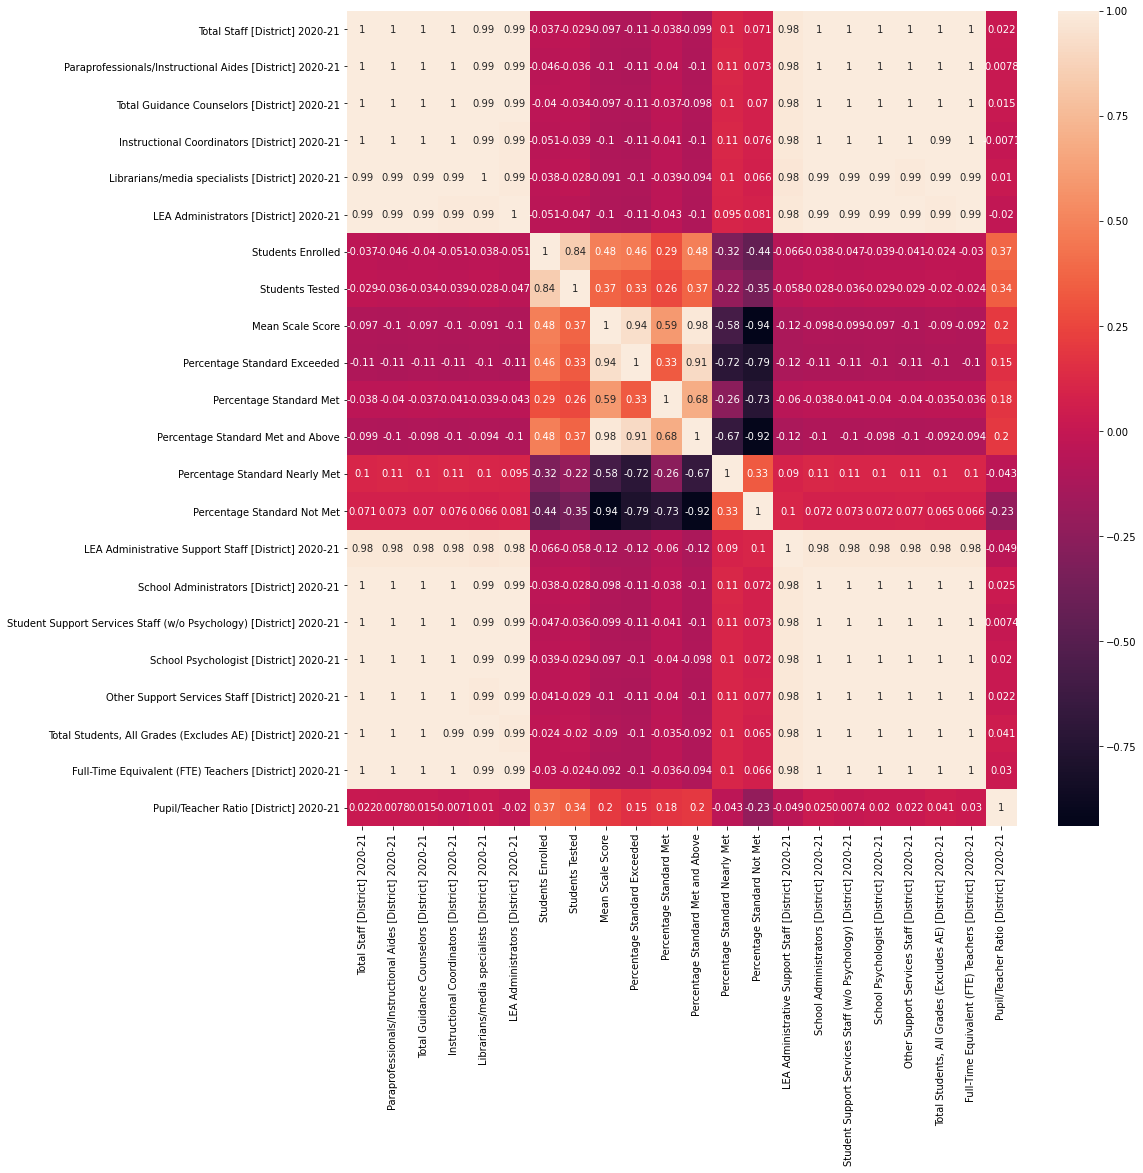

In [110]:
fig ,ax = plt.subplots(figsize=(15,15))

sns.heatmap(heat.corr(),annot=True, ax=ax )
plt.show()

<AxesSubplot:>

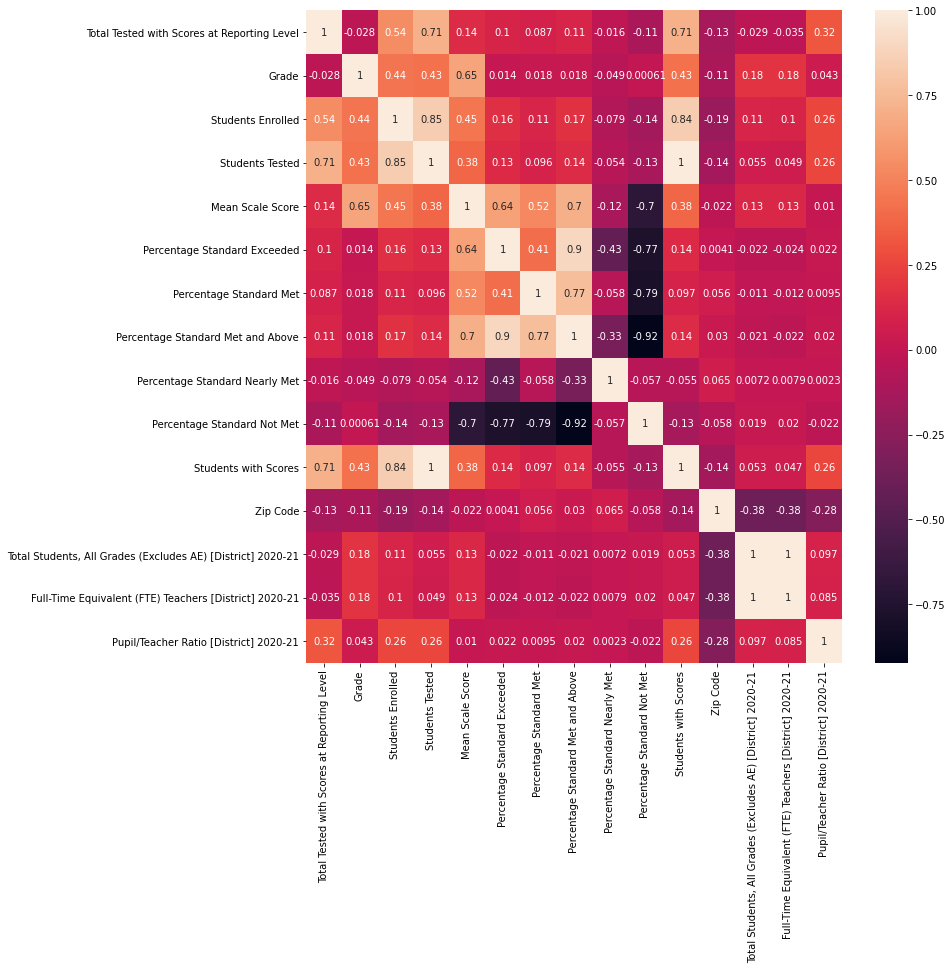

In [112]:
heat = comdf[[ 
       'Total Tested with Scores at Reporting Level', 'Grade',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'County Name', 'District Name',
       'School Name','Zip Code',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']]
fig ,ax = plt.subplots(figsize=(12,12))

sns.heatmap(heat.corr(),annot=True, ax=ax )